## **CH32845 - Data Science** 
#### *Primera Entrega*

### Dataset
- [Chocolate Bar Ratings](https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings)  - Ratings of over 2,500 chocolate bars from around the globe

#### Análisis Descriptivo

Las variables potencialmente interesantes son: 'bean_origin', 'cocoa_percent', 'num_ingredients',
       'ingredients' y 'rating'.

Algunas de las preguntas que este análisis intentará responder:
- ¿Qué origen tienen los granos de cacao con más alta calificación?
- ¿Existe una relación entre número de ingredientes y el porcentaje de cacao a la hora de obtener una más alta calificación?
- ¿Los ingredientes de la barra de chocolate afectan a su calificación?
- Con el correr de los años, el rating del top 3 de barras de chocolate, ¿Qué variación tuvo?
---

#### Carga de Datos

In [ ]:
# Se importan las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Indicar las versiones de las librerías
import sys
print("Python version: {}".format(sys.version))
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))

In [ ]:
# Leer los datos en PY
df = pd.read_csv('./data/chocolate_bars.csv')

#### Exploración de Datos

In [ ]:
# Qué tamaño tienen los datos?
df.shape

In [ ]:
# Nombre de las columnas para conocer los datos que proporciona este DF
df.columns

In [ ]:
#  Impresión (parcial) del DF
df

In [ ]:
# Qué tipos de datos tienen las columnas?
df.dtypes

In [ ]:
# Qué info proporciona el DF?
df.info()

In [ ]:
# Descripción estadística de los datos
df.describe()

In [ ]:
# Segmentación del DF que exclusivamente incluye las columnas señaladas como importantes para este análisis
df_selection = df.loc[:, ['bean_origin', 'cocoa_percent', 'num_ingredients','ingredients','rating']]

In [ ]:
# Primeros 5 datos del DF segmentado
df_selection.head()

In [ ]:
# Últimos 5 datos del DF segmentado
df_selection.tail()

In [ ]:
# Identificación de valores nulos (el .sum() retorna un recuento de los valores nulos, omitiendolo devuelve True False en c/linea)
df.isnull().sum() 

#### Distribución de los granos de Cacao de acuerdo a su origen
Gráfico de caja que representa la distribución de calificaciones del chocolate agrupadas por origen de grano de cacao.  

In [ ]:
# Cantidad de valores únicos en la columna 'bean_origin'
df.bean_origin.nunique()

In [ ]:
fig, ax = plt.subplots(figsize=[12,6])  # Crea una gráfico de tipo fig de 12in de largo por 6in de alto.
sns.set(rc={'axes.facecolor':'#d9d7d2', 'figure.facecolor':'white'}) # Establece el color del fondo de imagen para contrastar mejor los resultados
sns.boxplot(data=df, y='rating', x='bean_origin',ax=ax, palette='RdBu')  # is creating a box plot using the DataFrame df, with the variable 'rating' on the y-axis and 'bean_origin' on the x-axis. The ax parameter is specifying the axes on which to create the plot, in this case the ax object created in the first line.
plt.ylabel('Rating', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Cocoa Beans Origin', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.xticks(rotation = 90)  # Rota las etiquetas del eje-x 90 grados.
plt.title('Distribution of Cocoa Rating according to Bean Origin', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
# plt.show() imprime el grafico de forma desproporcionada
fig.tight_layout()  # Redimensiona el grafico para mejor visualización.

#### Distribución de la cantidad de ingredientes en las Tabletas de Chocolate

Crea un Gráfico de Barras que muestra el Número de Ingredientes en la muestra de las Tabletas de Chocolate.

In [ ]:
# Vista rápida de los dos primeros valores que deberían aparecer como más frecuentes en la cant. total de ingredientes 
df.num_ingredients.sample(10) 

In [ ]:
sns.countplot(x='num_ingredients', data=df, palette='RdBu')
plt.ylabel('Frequency', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Number of Ingredients', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Countplot of Number of Ingredients in Chocolate Bars', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

#### Distribución del porcentaje de Cacao en las Tabletas de Chocolate

Crea un diagrama de violín de la distribución de la variable 'cocoa_percent' del DataFrame. Esta gráfica mostrará los valores mínimo, primer cuartil, mediana, tercer cuartil y máximo de la variable 'cocoa_percent' con respecto a su presencia en las Tabletas de Chocolate analizadas.

In [ ]:
sns.violinplot(y=df['cocoa_percent'],color='#d6604d')
plt.ylabel('Cocoa Percent', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.title('Percentage of Cocoa in the Chocolate bars', loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

#### Las 5 mejores empresas en términos de Barras de Chocolate

Crea un gráfico de barras de la distribución de las empresas en función a la cantidad de tabletas que manufacturan.

In [ ]:
data1 = df['manufacturer'].value_counts().sort_values(ascending=False).head(5) # Top 5 companies in terms of chocolate bars in this dataset
data1 = pd.DataFrame(data1)
data1 = data1.reset_index()
sns.set()
plt.figure(figsize=(20,6))
sns.barplot(x='index', y='manufacturer', data=data1, palette='RdBu')
plt.ylabel('Number of Bars', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Chocolate Company', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Top 5 Companies in terms of Chocolate Bars', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

#### Las 5 mejores empresas en términos de su Calificación promedio

Crea un gráfico de barras de la distribución de las empresas en función del rating calificatorio.

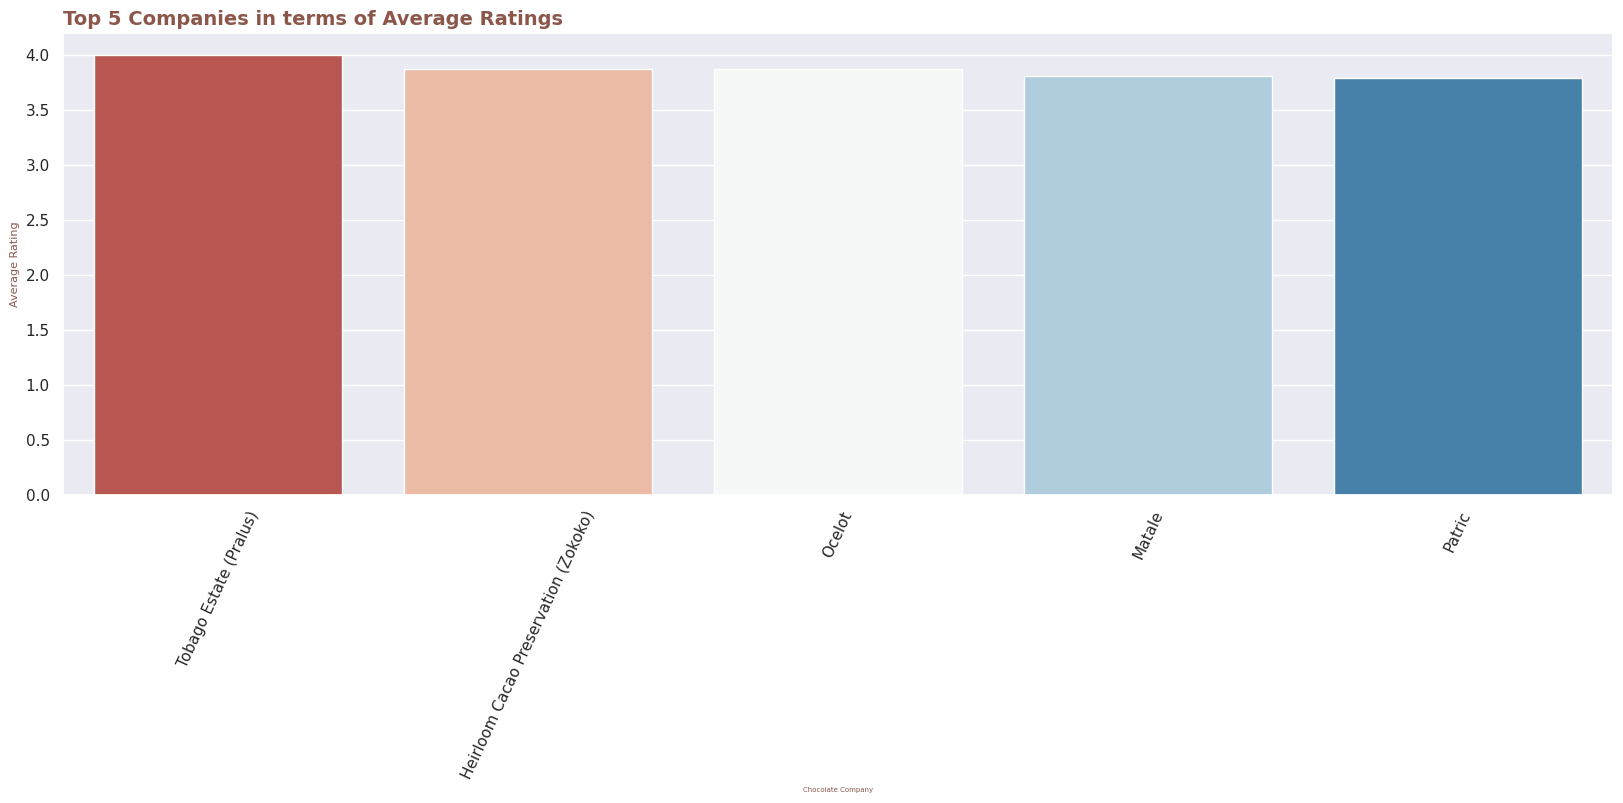

In [46]:
data2 = df.groupby('manufacturer').aggregate({'rating':'mean'})
data2 = data2.sort_values('rating', ascending=False).head(5)
data2 = data2.reset_index()
sns.set()
plt.figure(figsize=(20,6))
sns.barplot(x='manufacturer', y='rating', data=data2, palette='RdBu')
plt.ylabel('Average Rating', fontdict = {'fontsize':8, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Chocolate Company', fontdict = {'fontsize':5, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.xticks(rotation = 65)
plt.title('Top 5 Companies in terms of Average Ratings', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

#### Relación entre el % de Cacao y el Rating del Chocolate 

Gráfico de dispersión de la relación entre las columnas 'cocoa_percent' y 'rating' del DataFrame, utilizando la columna 'rating' como matiz.

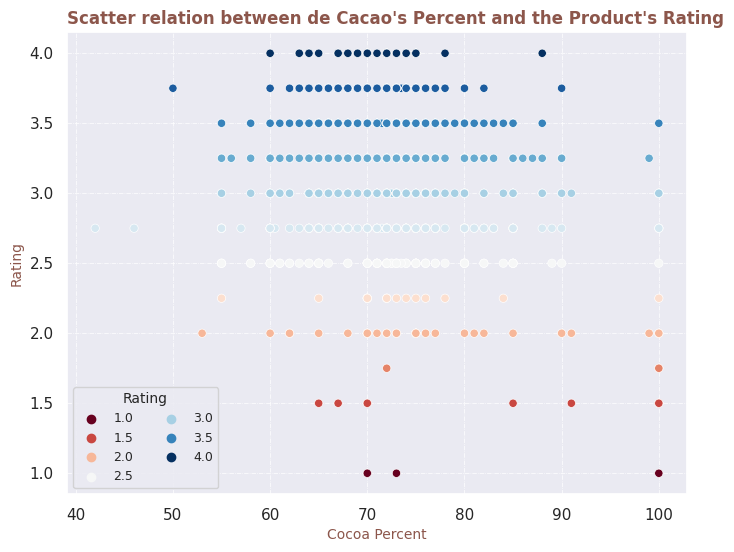

In [48]:
fig, ax = plt.subplots(figsize=[8,6])  # Crea una gráfico de tipo fig de 8in de largo por 6in de alto.
sns.scatterplot(x='cocoa_percent', y='rating', hue='rating', palette="RdBu",data=df)  # Crea un diagrama de dispersión de la relación entre 'cocoa_percent' y 'rating' del df, utilizando 'rating' para visualizar los matices.
plt.grid(True, linestyle='-.', linewidth=0.5, color='white')  # Que muestre la grilla representada por '-.' en color blanco
plt.ylabel('Rating', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Cocoa Percent', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Scatter relation between de Cacao\'s Percent and the Product\'s Rating', loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.legend(title="Rating",loc='lower left', ncol=2, fontsize=9, title_fontsize=10)  # Establece el rating como leyenda, lo posiciona e indica el tamaño de las letras
plt.show()

#### Distribución de la Calificación en las Tabletas de Chocolate

Gráfico de barras que representa la distribución de calificaciones en el total de las Tabletas de Chocolate analizadas.  

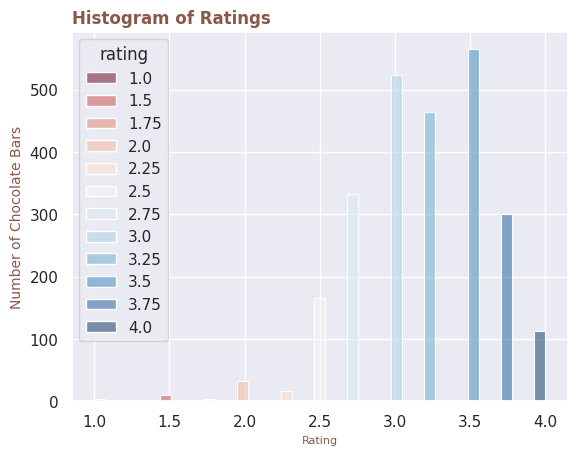

In [47]:
sns.histplot(data=df, x='rating', hue='rating', palette='RdBu')
plt.ylabel('Number of Chocolate Bars', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Rating', fontdict = {'fontsize':8, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Histogram of Ratings', loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()